# 110-2-Final_Group_2

# 數碩一
## 110221025 王先弘
## 110221002 周凱緯 （組長）
## 110221008 曾逸群



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
house_price = pd.read_csv('house_price.csv')

# Feature Selction

In [3]:
df= house_price[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
                 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

### Removing missing data

In [4]:
df = df.dropna()

In [5]:
# Explorating data
df.corr().head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,-0.075439,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,0.049305,...,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,0.138234,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,-0.068506,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,0.042314,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391


In [6]:
df.corr()['SalePrice'][abs(df.corr()['SalePrice']) > 0.5]

OverallQual     0.797881
YearBuilt       0.525394
YearRemodAdd    0.521253
TotalBsmtSF     0.615612
1stFlrSF        0.607969
GrLivArea       0.705154
FullBath        0.566627
TotRmsAbvGrd    0.547067
GarageYrBlt     0.504753
GarageCars      0.647034
GarageArea      0.619330
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [7]:
df.describe()['SalePrice']

count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Labeling Data

In [8]:
df['SP'] = df['SalePrice']
sp = df['SalePrice']
df['SP'][sp <= 131000.0] = 0     # SalePrice <= 1st Quartile (Q1)
df['SP'][(131000.0 < sp) & (sp <= 164900.0)] = 1 # Q1 < SalePrice <= Median
df['SP'][(164900.0 < sp) & (sp <= 219500.0)] = 2 # Median < SalePrice <= Q3
df['SP'][219500.0 <= sp] = 3      # 3rd Quartile (Q3) <= SalePrice

df['SP'].value_counts()

C:\Users\User\AppData\Local\Temp/ipykernel_7580/645123605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SP'][sp <= 131000.0] = 0     # SalePrice <= 1st Quartile (Q1)
C:\Users\User\AppData\Local\Temp/ipykernel_7580/645123605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SP'][(131000.0 < sp) & (sp <= 164900.0)] = 1 # Q1 < SalePrice <= Median
C:\Users\User\AppData\Local\Temp/ipykernel_7580/645123605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

0    282
3    281
2    279
1    279
Name: SP, dtype: int64

# Splitting the data into training set and testing set

In [9]:
X = df.T[:-2].T
Y = df['SP']

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=100)
print('Xtrain.shape:', Xtrain.shape)
print('Ytrain.shape:', Ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('Ytest.shape:', Ytest.shape)

Xtrain.shape: (840, 36)
Ytrain.shape: (840,)
Xtest.shape: (281, 36)
Ytest.shape: (281,)


## Model building

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

Model = [GaussianNB(),
         LogisticRegression(),
         DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=200),
         ExtraTreesClassifier(n_estimators=100)]

In [12]:
model = [Model[i].fit(Xtrain,Ytrain) for i in range(len(Model))]
pred  = [Model[i].predict(Xtest) for i in range(len(Model))]

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.metrics import accuracy_score
acc = [accuracy_score(Ytest, pred[i]) for i in range(len(model))]

num_chr = [12, 12, 12, 12, 10]
for i in range(len(Model)):
    print(str(Model[i])[:num_chr[i]] + ': \t', acc[i]) 

GaussianNB(): 	 0.6405693950177936
LogisticRegr: 	 0.6903914590747331
DecisionTree: 	 0.6476868327402135
RandomForest: 	 0.8078291814946619
ExtraTrees: 	 0.7580071174377224


## Accuracy scores & Confusion Matrices

GaussianNB(): 	 0.6405693950177936
LogisticRegr: 	 0.6903914590747331
DecisionTree: 	 0.6476868327402135
RandomForest: 	 0.8078291814946619
ExtraTrees: 	 0.7580071174377224


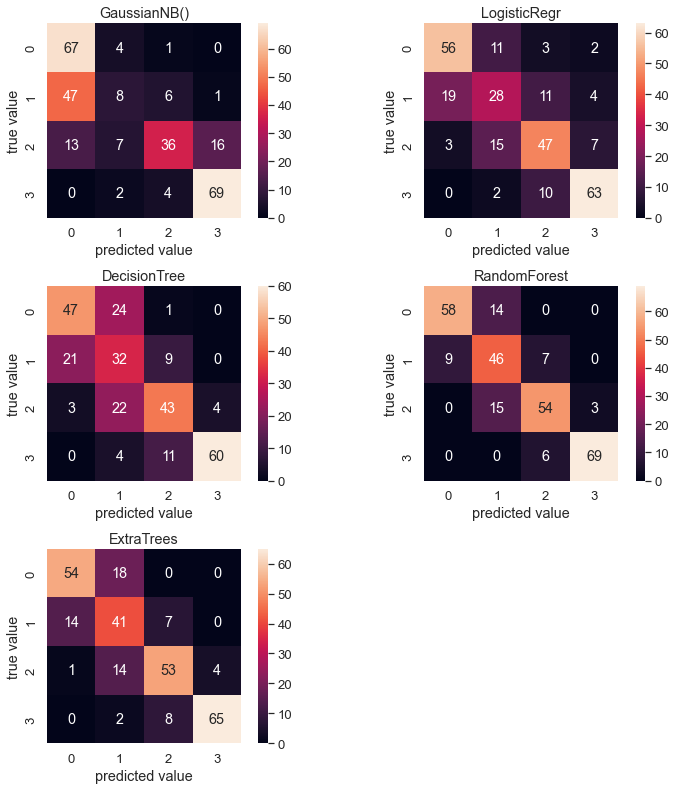

In [14]:
n_clf = len(Model)
clfs = [str(Model[i])[:num_chr[i]] 
                    for i in range(n_clf)]

# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = [confusion_matrix(Ytest, pred[i]) for i in range(n_clf)]

# Plot the confusion matrix as a color-encoded matrix...
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.35, wspace=0.1)

# plot the confusion matrices
for i in range(n_clf):
    sns.set(font_scale=1.2)
    fig.add_subplot(3, n_clf//2, i + 1, xticks=[], yticks=[])
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])
    sns.heatmap(mat[i], square=True, annot=True, cbar=True)
    plt.ylim(4, 0)
    plt.title(clfs[i])
    plt.xlabel('predicted value')
    plt.ylabel('true value');

# Discussion

    First, we dropped the features that are not important such as "PoolQC" ,etc. After that, we tried several combinations of different features. Second, we used PCA to do the feature reducion but the result didn't go well. The result shows our best combination of features that has the highest accuracy of the 5 methods eventually. And the results of the methods are shown above.
    Moreover, we attempt to use fewer features by dropping them out. The research below is that we only select the features that are highly correlated with the "SalePrice". As we can see the result wasn't good enough at all.

In [16]:
df2= house_price[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','SalePrice']]

In [17]:
df2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2003.0,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,1976.0,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2001.0,2,608,223500
3,7,1915,1970,756,961,1717,1,7,1998.0,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,1999.0,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,1978.0,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1941.0,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1950.0,1,240,142125


In [18]:
dropped_df2 = df2.dropna()
dropped_df2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2003.0,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,1976.0,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2001.0,2,608,223500
3,7,1915,1970,756,961,1717,1,7,1998.0,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,1999.0,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,1978.0,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1941.0,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1950.0,1,240,142125


In [21]:
dropped_df2.describe()['SalePrice']

count      1379.00000
mean     185479.51124
std       79023.89060
min       35311.00000
25%      134000.00000
50%      167500.00000
75%      217750.00000
max      755000.00000
Name: SalePrice, dtype: float64

In [22]:
dropped_df2['SP'] = dropped_df2['SalePrice']
sp2 = dropped_df2['SalePrice']
dropped_df2['SP'][sp2 <= 134000.0] = 0     # SalePrice <= 1st Quartile (Q1)
dropped_df2['SP'][(134000.0 < sp2) & (sp2 <= 167500.0)] = 1 # Q1 < SalePrice <= Median
dropped_df2['SP'][(167500.0 < sp2) & (sp2 <= 217750.0)] = 2 # Median < SalePrice <= Q3
dropped_df2['SP'][217750.0 <= sp2] = 3      # 3rd Quartile (Q3) <= SalePrice

dropped_df2['SP'].value_counts()

C:\Users\User\AppData\Local\Temp/ipykernel_7580/2604980392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df2['SP'] = dropped_df2['SalePrice']
C:\Users\User\AppData\Local\Temp/ipykernel_7580/2604980392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_df2['SP'][sp2 <= 134000.0] = 0     # SalePrice <= 1st Quartile (Q1)
C:\Users\User\AppData\Local\Temp/ipykernel_7580/2604980392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

0    346
3    345
2    344
1    344
Name: SP, dtype: int64

In [23]:
X2 = dropped_df2.T[:-2].T
Y2 = dropped_df2['SP']

In [28]:
X2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
0,7.0,2003.0,2003.0,856.0,856.0,1710.0,2.0,8.0,2003.0,2.0,548.0
1,6.0,1976.0,1976.0,1262.0,1262.0,1262.0,2.0,6.0,1976.0,2.0,460.0
2,7.0,2001.0,2002.0,920.0,920.0,1786.0,2.0,6.0,2001.0,2.0,608.0
3,7.0,1915.0,1970.0,756.0,961.0,1717.0,1.0,7.0,1998.0,3.0,642.0
4,8.0,2000.0,2000.0,1145.0,1145.0,2198.0,2.0,9.0,2000.0,3.0,836.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,6.0,1999.0,2000.0,953.0,953.0,1647.0,2.0,7.0,1999.0,2.0,460.0
1456,6.0,1978.0,1988.0,1542.0,2073.0,2073.0,2.0,7.0,1978.0,2.0,500.0
1457,7.0,1941.0,2006.0,1152.0,1188.0,2340.0,2.0,9.0,1941.0,1.0,252.0
1458,5.0,1950.0,1996.0,1078.0,1078.0,1078.0,1.0,5.0,1950.0,1.0,240.0


In [24]:
X2train, X2test, Y2train, Y2test = train_test_split(X2, Y2, random_state=100)
print('X2train.shape:', X2train.shape)
print('Y2train.shape:', Y2train.shape)
print('X2test.shape:', X2test.shape)
print('Y2test.shape:', Y2test.shape)

X2train.shape: (1034, 11)
Y2train.shape: (1034,)
X2test.shape: (345, 11)
Y2test.shape: (345,)


In [26]:
model = [Model[i].fit(X2train,Y2train) for i in range(len(Model))]
pred  = [Model[i].predict(X2test) for i in range(len(Model))]

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
acc = [accuracy_score(Y2test, pred[i]) for i in range(len(model))]

num_chr = [12, 12, 12, 12, 10]
for i in range(len(Model)):
    print(str(Model[i])[:num_chr[i]] + ': \t', acc[i]) 

GaussianNB(): 	 0.6434782608695652
LogisticRegr: 	 0.6057971014492753
DecisionTree: 	 0.6492753623188405
RandomForest: 	 0.736231884057971
ExtraTrees: 	 0.7130434782608696


GaussianNB(): 	 0.6434782608695652
LogisticRegr: 	 0.6057971014492753
DecisionTree: 	 0.6492753623188405
RandomForest: 	 0.736231884057971
ExtraTrees: 	 0.7130434782608696


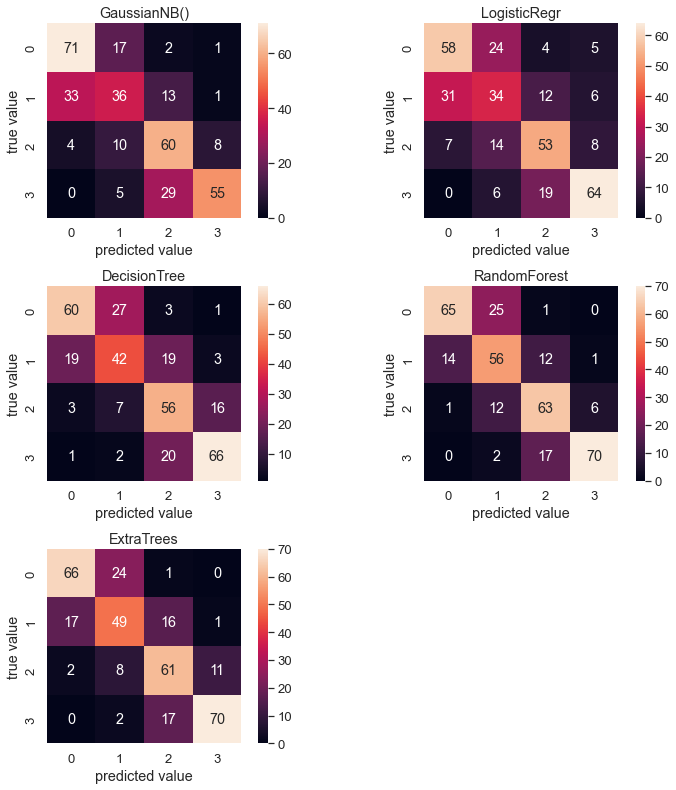

In [29]:
n_clf = len(Model)
clfs = [str(Model[i])[:num_chr[i]] 
                    for i in range(n_clf)]

# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = [confusion_matrix(Y2test, pred[i]) for i in range(n_clf)]

# Plot the confusion matrix as a color-encoded matrix...
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.35, wspace=0.1)

# plot the confusion matrices
for i in range(n_clf):
    sns.set(font_scale=1.2)
    fig.add_subplot(3, n_clf//2, i + 1, xticks=[], yticks=[])
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])
    sns.heatmap(mat[i], square=True, annot=True, cbar=True)
    plt.ylim(4, 0)
    plt.title(clfs[i])
    plt.xlabel('predicted value')
    plt.ylabel('true value');